# Chapter 1: Getting Started with Python Machine Learning


+ Python is a flexible language for rapid prototyping.
+ The underlying algorithms are all written in optimized C or C++.
+ Thus the resulting code is fast and robust enough to be used in production as well.


+ Code for the book available at https://github.com/luispedro/BuildingMachineLearningSystemsWithPython


+ Machine Learning is also referred to as Data Mining or Predictive Analysis.


#### Machine Learning Workflow (most of the time will be spent in rather mundane tasks)
+ Reading in the data and cleaning it
+ Exploring and understanding the input data
+ Analyzing how best to present the data to the learning algorithm
+ Choosing the right model and learning algorithm
+ Measuring the performance correctly

#### Feature Engineering
Often you will not feed the data directly into your machine learning algorithm. Instead you will find that you can refine parts of the data before training. Many times the machine learning algorithm will reward you with increased performance. You will even find that a simple algorithm with refined data generally outperforms a very sophisticated algorithm with raw data. This part of the machine learning workflow is called feature engineering, and is most of the time a very exciting and rewarding challenge

#### When Stuck, Use
+ http://metaoptimize.com/qa
+ http://stats.stackexchange.com
+ http://stackoverflow.com
+ #machinelearning
+ https://freenode.net/
+ http://www.TwoToReal.com

#### Machine Learning Blogs
+ http://blog.kaggle.com

#### SciPy.org [SciPy, Pandas, NumPy, Matplotlib, SymPy, IPython]  
Python is an interpreted language, and the reason for its popularity is its ability to off load number crunching tasks to lower-layered C or FORTRAN extensions such as NumPy (provides highly optimized multidimensional arrays) and SciPy (uses NumPy data structures to provide a set of fast numerical recipes).
+ http://www.scipy-lectures.org/index.html#
+ http://scipy.org/docs.html

## NumPy


In [1]:
%matplotlib inline

import sys
print("-- python version: %s" % sys.version)

# don't do the following in order to avoid name collisions
# from numpy import *
# instead use this
import numpy as np
print("-- numpy version: %s" % np.version.full_version)
print("-- numpy version: %s" % np.__version__)
import scipy as sp
print("-- scipy version: %s" % sp.__version__ )
import sklearn as skl
print("-- scikit-learn version: %s" % skl.__version__)
import matplotlib as mpl
print("-- matplotlib version: %s" % mpl.__version__)
import matplotlib.pyplot as plt

-- python version: 3.5.2 |Anaconda 4.0.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
-- numpy version: 1.10.4
-- numpy version: 1.10.4
-- scipy version: 0.17.0
-- scikit-learn version: 0.17.1
-- matplotlib version: 1.5.1


In [2]:
## NumPy array
a=np.array([0,1,2,3,4,5])
print("-- numpy array: %s" % a)
print("-- dimensions: %s" % a.ndim)
print("-- shape: "); print(a.shape)

-- numpy array: [0 1 2 3 4 5]
-- dimensions: 1
-- shape: 
(6,)


In [3]:
## Transform a into 2 dimensional matrix.
b=a.reshape((3,2))
print("-- 3x2 matrix: "); print(b)
print("-- dimensions: %s" % b.ndim)
print("-- shape: "); print(b.shape)

-- 3x2 matrix: 
[[0 1]
 [2 3]
 [4 5]]
-- dimensions: 2
-- shape: 
(3, 2)


In [4]:
## NumPy optimization: copies are shallow copies.
b[1][0]=77
print("-- b: "); print(b)
print("-- a: "); print(a)

## For deep copy, use copy().
c=a.reshape((3,2)).copy()
print("-- c: "); print(c)
c[0][0]=-99
print("-- a: "); print(a)
print("-- c: "); print(c)

-- b: 
[[ 0  1]
 [77  3]
 [ 4  5]]
-- a: 
[ 0  1 77  3  4  5]
-- c: 
[[ 0  1]
 [77  3]
 [ 4  5]]
-- a: 
[ 0  1 77  3  4  5]
-- c: 
[[-99   1]
 [ 77   3]
 [  4   5]]


In [5]:
## Operations are propagated to the individual elements.
d=np.array([1,2,3,4,5])
print("-- d: "); print(d)
print("-- d*2: "); print(d*2)
print("-- d**2: "); print(d**2)

## Contrast this with ordinary Python lists.
o=[1,2,3,4,5]
print("-- o: "); print(o)
print("-- o*2: "); print(o*2)
print("-- o**2: "); 
try:
    print(o**2)
except TypeError as typeError:
    print("TypeError: " + str(typeError))

-- d: 
[1 2 3 4 5]
-- d*2: 
[ 2  4  6  8 10]
-- d**2: 
[ 1  4  9 16 25]
-- o: 
[1, 2, 3, 4, 5]
-- o*2: 
[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
-- o**2: 
TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'


In [6]:
## Numpy indexing.
print("-- a[np.array([2,3,4])]: "); print(a[np.array([2,3,4])])
print("-- a>4: "); print(a>4)
print("-- a[a>4]: "); print(a[a>4])
print("-- trim outliers; a[a>4]=4; a: "); a[a>4]=4; print(a)
print("-- clip outliers; a.clip(0,4): "); print(a.clip(0,4))

-- a[np.array([2,3,4])]: 
[77  3  4]
-- a>4: 
[False False  True False False  True]
-- a[a>4]: 
[77  5]
-- trim outliers; a[a>4]=4; a: 
[0 1 4 3 4 4]
-- clip outliers; a.clip(0,4): 
[0 1 4 3 4 4]


In [7]:
## Numpy NAN.
e=np.array([1,2,np.NAN,3,4])
print("-- e: "); print(e)
print("-- np.isnan(e): "); print(np.isnan(e))
print("-- e[~np.isnan(e)]"); print(e[~np.isnan(e)])
print("-- np.mean(e[~np.isnan(e)])"); print(np.mean(e[~np.isnan(e)]))

-- e: 
[  1.   2.  nan   3.   4.]
-- np.isnan(e): 
[False False  True False False]
-- e[~np.isnan(e)]
[ 1.  2.  3.  4.]
-- np.mean(e[~np.isnan(e)])
2.5


In [8]:
## Comparing runtime
## we should strive to use highly optimized NumPy or SciPy extension functions (ex: dot())
import timeit as tt
normal_py_sec=tt.timeit('sum(x*x for x in range(1000))',number=10000)
print("-- Normal Python: %f sec" % normal_py_sec)
native_np_sec=tt.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)",number=10000)
print("-- Native Numpy: %f sec" % native_np_sec)
good_np_sec=tt.timeit('na.dot(na)',setup="import numpy as np; na=np.arange(1000)",number=10000)
print("-- Good Numpy: %f sec" % good_np_sec)

-- Normal Python: 0.908617 sec
-- Native Numpy: 0.817787 sec
-- Good Numpy: 0.014726 sec


In [9]:
## Speed comes at a price
## NumPy arrays can hold only one data type
f=np.array([1,2,3])
print("-- f: "); print(f)
print("-- f data type: "); print(f.dtype)

## Numpy coerces to the most reasonable common data type
g=np.array([1,"stringy"])
print("-- g: "); print(g)
print("-- g data type: "); print(g.dtype)
h=np.array([1,"stringy",set([1,2,3])])
print("-- h: "); print(h)
print("-- h data type: "); print(h.dtype)

-- f: 
[1 2 3]
-- f data type: 
int32
-- g: 
['1' 'stringy']
-- g data type: 
<U11
-- h: 
[1 'stringy' {1, 2, 3}]
-- h data type: 
object


## SciPy

In [10]:
## the complete namespace of NumPy is also accessible via SciPy
sp.dot is np.dot

True

### ScipPy packages functionalities

#### cluster
+ Hierarchical clustering (cluster.hierarchy)
+ Vector quantization / k-means (cluster.vq)

#### constants
+ Physical and mathematical constants
+ Conversion methods

#### fftpack
+ Discrete Fourier transform algorithms

#### integrate
+ Integration routines

#### interpolate
+ Interpolation (linear, cubic, and so on)

#### io
+ Data input and output

#### linalg
+ Linear algebra routines using the optimized BLAS and LAPACK libraries

#### ndimage
+ n-dimensional image package

#### odr
+ Orthogonal distance regression

#### optimize
+ Optimization (finding minima and roots)

#### signal
+ Signal processing

#### sparse
+ Sparse matrices

#### spatial
+ Spatial data structures and algorithms

#### special
+ Special mathematical functions such as Bessel or Jacobian

#### stats
+ Statistics toolkit

### Most interesting for us
+ scipy.stats
+ scipy.interpolate
+ scipy.cluster
+ scipy.signal

## Our first application of machine learing

MLaaS sells the service of providing machine learning algorithms via HTTP. The question is, when will we hit the limit of our current infrastructure, which we estimated to be at 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.

In [11]:
## reading in the data
data=sp.genfromtxt("ch01\data\web_traffic.tsv",delimiter="\t")
print(data[:10,])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


In [12]:
## processing and cleaning the data
x=data[:,0]
print("-- x[:10,]: ")
print(x[:10,])

y=data[:,1]
print("-- y[:10,]: ")
print(y[:10,])

nan_sum=sp.sum(sp.isnan(y))
print("-- nan_sum: ")
print(nan_sum)

# as only 8 entries are nan out of 743, we can afford to remove them
print("-- nan%: ")
print(nan_sum/data.shape[0]*100)

x=x[~sp.isnan(y)]
print("-- x[:10,]: ")
print(x[:10,])


y=y[~sp.isnan(y)]
print("-- y[:10,]: ")
print(y[:10,])

-- x[:10,]: 
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
-- y[:10,]: 
[ 2272.    nan  1386.  1365.  1488.  1337.  1883.  2283.  1335.  1025.]
-- nan_sum: 
8
-- nan%: 
1.07671601615
-- x[:10,]: 
[  1.   3.   4.   5.   6.   7.   8.   9.  10.  11.]
-- y[:10,]: 
[ 2272.  1386.  1365.  1488.  1337.  1883.  2283.  1335.  1025.  1139.]


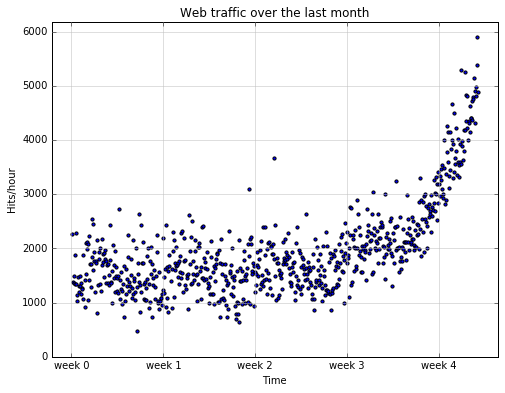

In [13]:
colors=['g','k','b','m','r']
linestyles=['-','-.','--',':','-']

# plot input data
def plot_models(x,y,models,fname,mx=None,ymax=None,xmin=None):
    plt.figure(num=None,figsize=(8,6))
    plt.clf() # clear the current figure
    plt.scatter(x,y,s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
    
    if models:
        if mx is None:
            mx=sp.linspace(0,x[-1],1000)
        for model,style,color in zip(models,linestyles,colors):
            #print "Model:",model
            #print "Coeffs:",model.coeffs
            plt.plot(mx,model(mx),linestyle=style,linewidth=2,c=color)
        plt.legend(["d=%i" % m.order for m in models],loc="upper left")
    
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True,linestyle='-',color='0.75') # draw a slightly opaque, dashed grid
    plt.show() # use plt.save(fname) for saving to a file
    
plot_models(x,y,None,None)

## Choosing the right model and correct algorithm
Since models are simplified theoretical approximations of complex reality, there will always be approximation error. This error guides us in choosing the right model, and is calculated as the squared distance of the model's prediction to the real data.

In [14]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

## Starting with a simple straight line

Model parameters of fp1: [   2.59619213  989.02487106]
Error of the model through fp1:  [  3.17389767e+08]
Model error through f1:  317389767.34


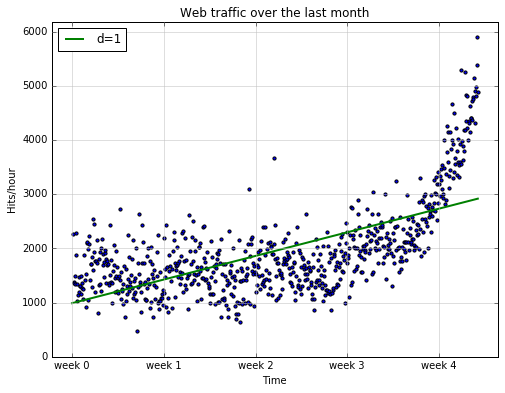

In [15]:
# polyfit() provides with the smallest approximation error for the location of the straight line
# full=True returns additional background information on the fitting process
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x,y,1,full=True) 
print("Model parameters of fp1: %s" % fp1)
print("Error of the model through fp1: ", res1)

## Hence, the best straight line fit is
## f(x)=2.59619213*x + 989.02487106
## Using poly1d() to create the model function from model parameters
f1=sp.poly1d(fp1)
print("Model error through f1: ", error(f1,x,y))
plot_models(x,y,[f1],None)

## straight line model seems to be a bad assumption,
## as after week4 the hits/hour take off.
## Also, we don't know what the model error means unless we compare it with another

Model parameters of fp2: [  1.05322215e-02  -5.26545650e+00   1.97476082e+03]
Model error through f2:  179983507.878


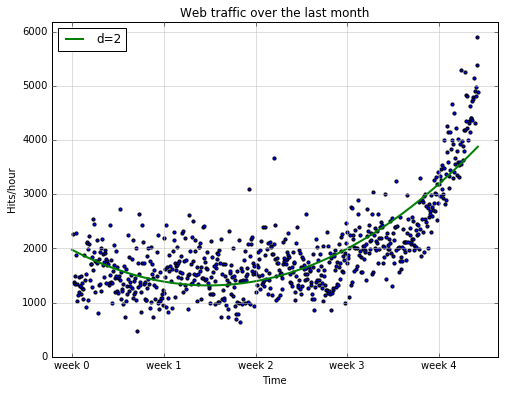

In [16]:
## Using more complex model, a polynomial of degree 2
fp2=sp.polyfit(x,y,2)
print("Model parameters of fp2: %s" % fp2)
f2=sp.poly1d(fp2)
print("Model error through f2: ",error(f2,x,y))
plot_models(x,y,[f2],None)

## Model error is less than d=1, but complexity has increased,
## as we have 1 more parameter to tune inside polyfit()
## f(x)=0.0105322215*x**2 - 5.26545650*x + 1974.76082

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Model error d=1:  317389767.34
Model error d=2:  179983507.878
Model error d=3:  139350144.032
Model error d=10:  121942326.364
Model error d=100:  109452406.29


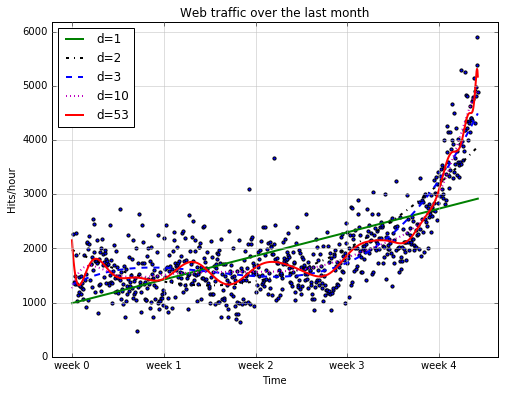

In [17]:
## Increasing complexity, using polynomials of degree 3, 10, 100
f3=sp.poly1d(sp.polyfit(x,y,3))
f10=sp.poly1d(sp.polyfit(x,y,10))
f100=sp.poly1d(sp.polyfit(x,y,100))
print("Model error d=1: ",error(f1,x,y))
print("Model error d=2: ",error(f2,x,y))
print("Model error d=3: ",error(f3,x,y))
print("Model error d=10: ",error(f10,x,y))
print("Model error d=100: ",error(f100,x,y))
plot_models(x,y,[f1,f2,f3,f10,f100],None)

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363662
Error d=53: 109452406.290233

Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.265242
Error d=53: 18656111.329257

Before inflection error fa: 110806407.089998
After inflection error fb: 22143941.107618
Inflection error:  132950348.198


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


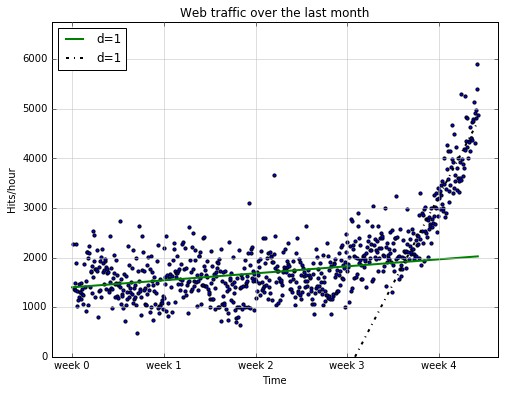

In [20]:
## RankWarning: Polyfit may be poorly conditioned
## This means because of numerical errors, 
## polyfit cannot determine a good fit with 100 degrees. 
## Instead, it figured that 53 must be good enough.

## Looking at the polynomial of degree 10 and 53, 
## we see wildly oscillating behavior. 
## It seems that the models are fitted too much to the data. 
## So much that it is now capturing not only the underlying process but also the noise. 
## This is called overfitting.

## At this point, we have the following choices:
##   Choosing one of the fitted polynomial models.
##   Switching to another more complex model class. Splines?
##   Thinking differently about the data and start again.

## Taking another look at the data. 
## It seems that there is an inflection point between weeks 3 and 4. 
## So let's separate the data and train two lines using week 3.5 as a separation point:

inflection=3.5*7*24
xa=x[:inflection] # before inflection
ya=y[:inflection]
xb=x[inflection:] # after inflection
yb=y[inflection:]

fa=sp.poly1d(sp.polyfit(xa,ya,1))
fb=sp.poly1d(sp.polyfit(xb,yb,1))

print("Errors for the complete data set:")
for f in [f1,f2,f3,f10,f100]:
    print("Error d=%i: %f" % (f.order,error(f,x,y)))

print("\nErrors for only the time after inflection point")
for f in [f1,f2,f3,f10,f100]:
    print("Error d=%i: %f" % (f.order,error(f,xb,yb)))
    
fa_error=error(fa,xa,ya)
fb_error=error(fb,xb,yb)
print("\nBefore inflection error fa: %f" % fa_error)
print("After inflection error fb: %f" % fb_error)
print("Inflection error: ",sp.sum([fa_error,fb_error]))
plot_models(x,y,[fa,fb],None)

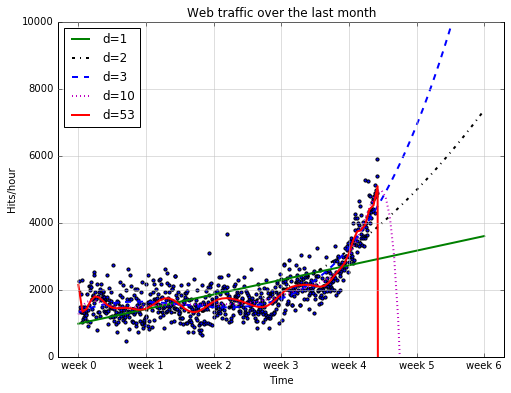

In [21]:
## Combination of these lines seem a much better fit,
## but still the combined error is higher than the higher order polynomials.

## extrapolating into the future
plot_models(x,y,[f1,f2,f3,f10,f100],None,mx=sp.linspace(0*7*24,6*7*24,100),ymax=10000,xmin=0*7*24)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Errors for only the time after inflection point.
Error d1: 22143941.107618
Error d2: 19768846.989176
Error d3: 19766452.361027
Error d10: 18949296.475008
Error d53: 18300809.914443


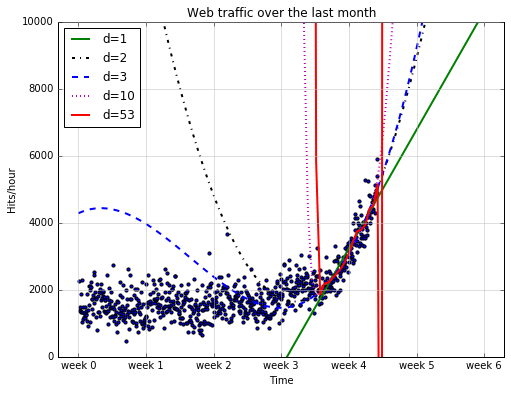

In [22]:
## d=10 and d=53 are useless for extrapolating due to overfitting (try to hard to model given data correctly)
## d=1 is useless for extrpolating due to underfitting (not capable of capturing the data good enough)

## As the last week says more about the future than the data prior to it,
## lets fit the models only to data of the last week.

## Trained only on data after inflection point
fb1=fb
fb2=sp.poly1d(sp.polyfit(xb,yb,2))
fb3=sp.poly1d(sp.polyfit(xb,yb,3))
fb10=sp.poly1d(sp.polyfit(xb,yb,10))
fb100=sp.poly1d(sp.polyfit(xb,yb,100))

print("Errors for only the time after inflection point.")
for f in ([fb1,fb2,fb3,fb10,fb100]):
    print("Error d%i: %f" % (f.order,error(f,xb,yb)))

plot_models(x,y,[fb1,fb2,fb3,fb10,fb100],None,mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),ymax=10000,xmin=0*7*24)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:586: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Test errors for only the time after inflection point
Error d1: 9716676.449587
Error d2: 8373497.818956
Error d3: 8590894.506614
Error d10: 9746067.270254
Error d53: 9728676.893210


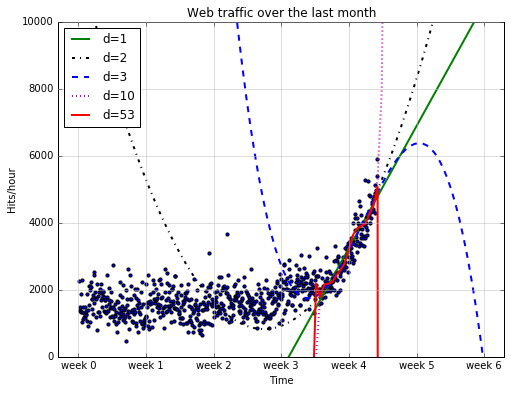

In [28]:
## The most complex model seem to have the least error,
## note that we calculated the error only on the time after the inflextion point.

## separating training from testing data (after inflection point - last week)
frac=0.3 # 30%
splitidx=int(frac*len(xb))
shuffled=sp.random.permutation(list(range(len(xb))))
test=sorted(shuffled[:splitidx])
train=sorted(shuffled[splitidx:])
fbt1=sp.poly1d(sp.polyfit(xb[train],yb[train],1))
fbt2=sp.poly1d(sp.polyfit(xb[train],yb[train],2))
fbt3=sp.poly1d(sp.polyfit(xb[train],yb[train],3))
fbt10=sp.poly1d(sp.polyfit(xb[train],yb[train],10))
fbt100=sp.poly1d(sp.polyfit(xb[train],yb[train],100))

print("Test errors for only the time after inflection point")
for f in [fbt1,fbt2,fbt3,fbt10,fbt100]:
    print("Error d%i: %f" % (f.order,error(f,xb[test],yb[test])))

plot_models(x,y,[fbt1,fbt2,fbt3,fbt10,fbt100],None,mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),ymax=10000,xmin=0*7*24)    
    

In [30]:
## d=2 has the lowest test error,
## when measured using test data 
## on a model created using training data.
## This gives us hope for good results using future data.

## Answering our question of when will our infrastructure read 100K requests per hour.
print("fbt2(x)= \n%s"%fbt2)
print("\nfbt2(x)-100,000= \n%s"%(fbt2-100000))

## Having a polynomial of degree 2, 
## we could simply compute the inverse of the function and calculate its value at 100,000. 
## Of course, we would like to have an approach that is applicable to any model function easily.
## This can be done by subtracting 100,000 from the polynomial, 
## which results in another polynomial, and finding its root. 
## SciPy's optimize module has the function fsolve that achieves this, 
## when providing an initial starting position with parameter x0. 
## As every entry in our input data file corresponds to one hour, 
## and we have 743 of them, we set the starting position to some value after that.

from scipy.optimize import fsolve
reached_max=fsolve(fbt2-100000,x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

fbt2(x)= 
         2
0.05206 x - 47.98 x + 1.188e+04

fbt2(x)-100,000= 
         2
0.05206 x - 47.98 x - 8.812e+04
100,000 hits/hour expected at week 10.958640


In [31]:
## Of course, there is a certain uncertainty involved with our prediction. 
## To get a real picture of it, one could draw in more sophisticated statistics to find out about the variance
## we have to expect when looking farther and farther into the future.

## And then there are the user and underlying user behavior dynamics that we cannot model accurately. 
## However, at this point, we are fine with the current predictions. 
## After all, we can prepare all time-consuming actions now. 
## If we then monitor our web traffic closely, we will see in time when we have to allocate new resources.